<a href="https://colab.research.google.com/github/BojanKomazec/tensorflow-demo-notebooks/blob/main/Simple_linear_regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression with ANN with single neuron
https://www.tensorflow.org/tutorials/keras/regression#linear_regression

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [89]:
#
# Create x and y values for datapoints
#

dataset_x = np.linspace(-1, 1, 100)
print(f'dataset_x.shape = {dataset_x.shape}')

# Our model will need to learn these values
SLOPE = 2
INTERCEPT = -1

rng = np.random.default_rng()
dataset_y = ((SLOPE * dataset_x) + INTERCEPT) + rng.standard_normal(*dataset_x.shape) * 0.33

dataset_x.shape = (100,)


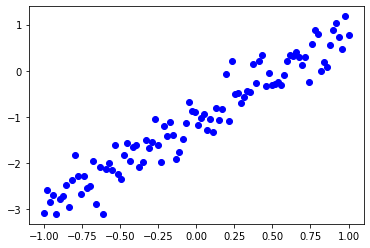

In [90]:
#
# (Optional) Plot data points
#

plt.plot(dataset_x, dataset_y, 'bo')
plt.show()

In [91]:
#
# Create a training and test datasets
#

dataset = list(zip(dataset_x, dataset_y))
print(f'dataset = {dataset}') # list of (x, y) tuples

# Pandas dataframe
df_dataset = pd.DataFrame.from_records(dataset, columns = ['x', 'y'] )

dataset_train = df_dataset.sample(frac=0.8, random_state=0)
print(f'dataset_train.shape = {dataset_train.shape}')
dataset_test = df_dataset.drop(dataset_train.index)
print(f'dataset_test.shape = {dataset_test.shape}')

dataset = [(-1.0, -3.070829994336497), (-0.9797979797979798, -2.5845064314548054), (-0.9595959595959596, -2.8473915322380288), (-0.9393939393939394, -2.6960191813309753), (-0.9191919191919192, -3.0985604647905887), (-0.898989898989899, -2.768695662074836), (-0.8787878787878788, -2.702626142661953), (-0.8585858585858586, -2.476295360891019), (-0.8383838383838383, -2.9466570268798176), (-0.8181818181818181, -2.3625873985402217), (-0.797979797979798, -1.8149989480693884), (-0.7777777777777778, -2.278112532069877), (-0.7575757575757576, -2.6703102211236383), (-0.7373737373737373, -2.2868374574925237), (-0.7171717171717171, -2.5277566668956784), (-0.696969696969697, -2.5033703885441834), (-0.6767676767676767, -1.9614431456064154), (-0.6565656565656566, -2.888415094611034), (-0.6363636363636364, -2.0854690868528287), (-0.6161616161616161, -3.092952634050579), (-0.5959595959595959, -2.1299952818593084), (-0.5757575757575757, -2.0036315931383246), (-0.5555555555555556, -2.156392967139847), (-0

In [92]:
#
# Define function which plots 
#

# 
def plot_fn(dataset_x, dataset_y, x, y):
  plt.plot(dataset_x, dataset_y, 'bo', label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

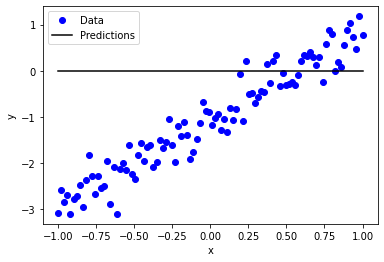

In [93]:
#
# Initialize parameters
#
k = 0
b = 0
y = 0

#
# Plot the initial hypothesis
# 
y = k * dataset_x + b
plot_fn(dataset_x, dataset_y, dataset_x, y)

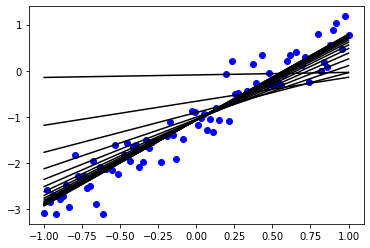

In [94]:
#
# Learn parameters (Gradient Descent algorithm)
#

learning_rate = 0.1
epochs = 200

# Plot training set
plt.plot(dataset_train['x'], dataset_train['y'], 'bo', label='Data')

# Gradient Descent iterations
for i in range(epochs):
    # current predicted value of y (hypothesis)
    h = k * dataset_train['x'] + b  
    dk = (1/n) * sum((h - dataset_train['y']) * dataset_train['x'])
    db = (1/n) * sum(h - dataset_train['y']) 
    k = k - learning_rate * dk 
    b = b - learning_rate * db

    # Add to a figure a current function approximation (during learning).
    # Observe how it gets closer to the original line.
    if i % 10 == 0:
      y = k * dataset_x + b
      plt.plot(dataset_x, y, color='k', label='Predictions')

In [95]:
#
# Print the values of learned and original model parameters.
#

print(f'Learned slope is {k} while original is {SLOPE}')
print(f'Learned intercept is {b} while original is {INTERCEPT}')

# k and b are approximations and will not completely match SLOPE and INTERCEPT 
# from the function we used to create a dataset. Increasing epochs numbers can 
# help up to certain level of accuracy.

Learned slope is 1.8578658364336689 while original is 2
Learned intercept is -1.0639781168700335 while original is -1


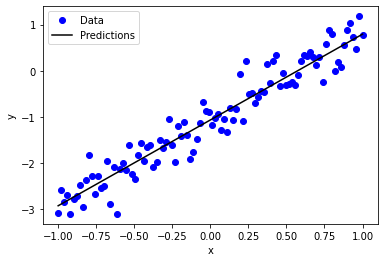

In [96]:
#
# 
# Plot the final function approximation
#

y = k * dataset_x + b
plot_fn(dataset_x, dataset_y, dataset_x, y)

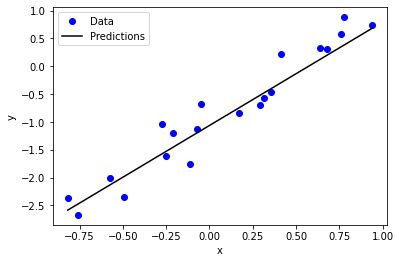

In [97]:
#
# Plot the function approximation on test (validation) set
#

test_y = k * dataset_test['x'] + b
plot_fn(dataset_test['x'], dataset_test['y'], dataset_test['x'], test_y)